In [0]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import cluster
from scipy.misc import face
from skimage.measure import compare_ssim as ssim
%matplotlib inline

In [0]:
#load face
face = face(gray=True)

In [3]:
#K-Means clustoring
n_clusters = 5
np.random.seed(0)
X = face.reshape((-1, 1))  
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=4, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
print(values)
print(labels)

[111.62805703  27.11166441 192.8878986   73.35388722 150.24313581]
[0 0 4 ... 4 4 4]


In [5]:
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()
print(vmin)
print(vmax)

0
250


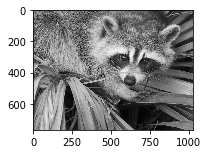

In [6]:
#original face
plt.figure(1, figsize=(3, 2.2))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)

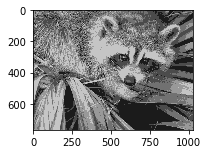

In [7]:
# compressed face
plt.figure(2, figsize=(3, 2.2))
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

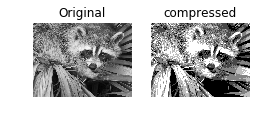

In [8]:
# load the images -- original and compressed
original = face
compressed = face_compressed

# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("compressed", compressed)

# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")

**Check similarity between two impages using function "compare_images"**

Used mean squared error(MSE) and structural similarity(SSIM) to check similarity between two images MSE equal to 0 and SSIM equals to 1 means two images are similar to each other, otherwise not.

In [0]:
#Mean Squared Error
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar" the two images are
    return err

# compute the MSE and structural similarity index for the images
def compare_images(imageA, imageB, title):
    m = mse(imageA, imageB)
    s = ssim(imageA.astype('float'), imageB.astype('float'))

    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")

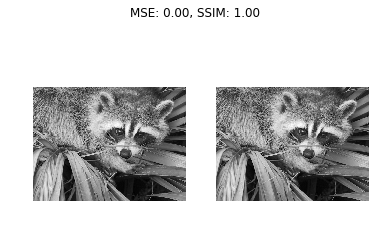

In [10]:
# compare the same images
compare_images(original, original, "Original vs. Original")

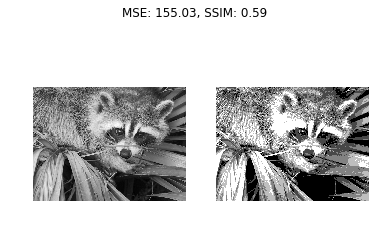

In [11]:
compare_images(original, compressed, "Original vs. compressed")